# Crop Damage Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_yaOffsB.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(88858, 10)

In [4]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

### Data Preprocessing

In [7]:
# Drop ID Column
df = df.drop(columns = ["ID"])
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


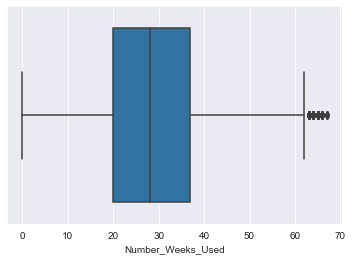

In [9]:
sns.boxplot(x = df.Number_Weeks_Used)
plt.show()

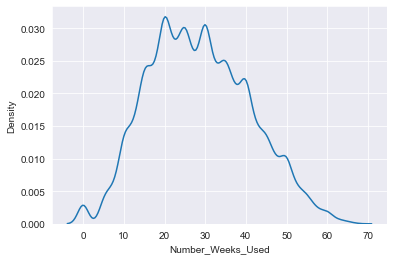

In [12]:
sns.kdeplot(x = df.Number_Weeks_Used)
plt.show()

In [14]:
df["Number_Weeks_Used"].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [20]:
outlier = df["Number_Weeks_Used"].describe()["75%"] + (df["Number_Weeks_Used"].describe()["75%"] - df["Number_Weeks_Used"].describe()["25%"]) * 1.5

In [21]:
df["Number_Weeks_Used"] = np.where(df["Number_Weeks_Used"] > outlier, outlier, df["Number_Weeks_Used"])

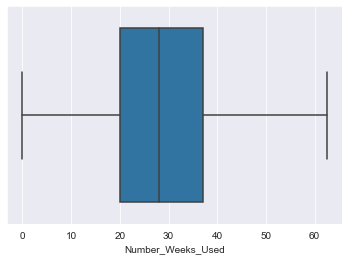

In [22]:
sns.boxplot(x = df.Number_Weeks_Used)
plt.show()

In [23]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 30)
imputer.fit(df.iloc[:, :-1])
df_imputed = imputer.transform(df.iloc[:, :-1])

In [27]:
df_imputed = pd.DataFrame(df_imputed, columns = df.iloc[:, :-1].columns)
df_imputed.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [28]:
df_imputed["Crop_Damage"] = df["Crop_Damage"]

In [29]:
df_imputed.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [30]:
df = df_imputed.copy()

In [31]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [33]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

### Question: In which season crop damage is happening more?
<br>Note: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

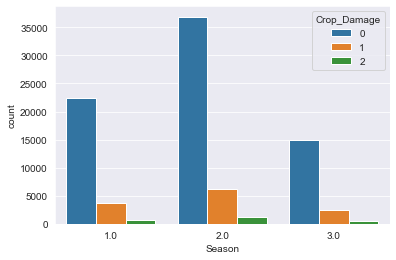

In [37]:
sns.countplot(x = df["Season"], hue = df["Crop_Damage"])
plt.show()

In season 2 crop damage is happening more compared to other seasons

### Question: Average Insect Count in each crop damage type 

In [66]:
df.groupby("Crop_Damage").mean()["Estimated_Insects_Count"]

Crop_Damage
0    1315.707387
1    1839.106200
2    1731.111976
Name: Estimated_Insects_Count, dtype: float64

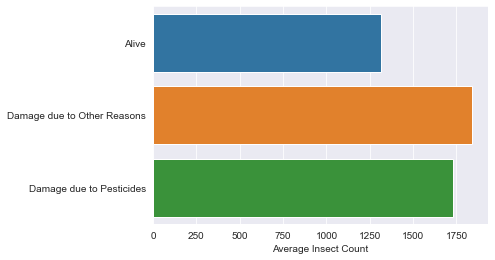

In [70]:
sns.barplot(y = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"],x = df.groupby("Crop_Damage").mean()["Estimated_Insects_Count"])
plt.xlabel("Average Insect Count")
plt.show()

In Damage due to Other Reasons Average insect count is more

### Question: Which crop type more crop damage is happening

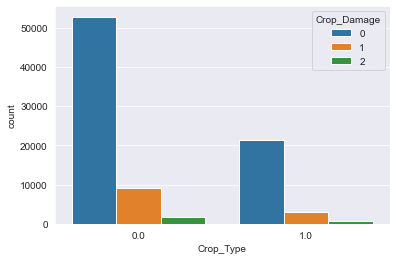

In [79]:
sns.countplot(x = df["Crop_Type"], hue = df["Crop_Damage"])
plt.show()

### Question: In Which soil type more crop damage is happening

In [89]:
ct = pd.crosstab(df["Soil_Type"], df["Crop_Damage"])
ct

Crop_Damage,0,1,2
Soil_Type,,,
0.0,39841,6953,1330
1.0,34397,5354,983


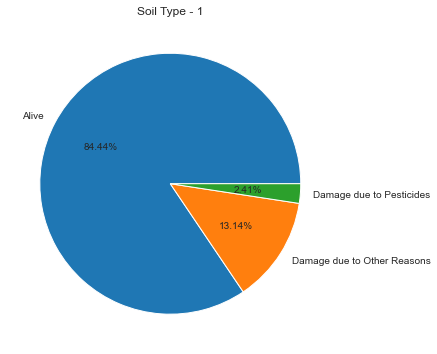

In [101]:
plt.figure(figsize = (6,6))
plt.pie(ct.iloc[1, :], labels = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"], autopct = "%1.2f%%")
plt.title("Soil Type - 1")
plt.show()

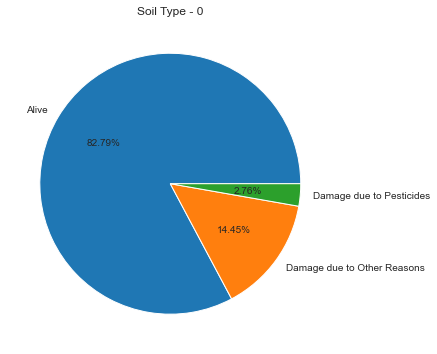

In [102]:
plt.figure(figsize = (6,6))
plt.pie(ct.iloc[0, :], labels = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"], autopct = "%1.2f%%")
plt.title("Soil Type - 0")
plt.show()

### Model Building

In [103]:
X = df.drop(columns = ["Crop_Damage"])
y = df.Crop_Damage

In [104]:
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [105]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

### Logistic Regression:

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
errors = cross_val_score(estimator = DecisionTreeClassifier(),
                         X = X,
                         y = y,
                         cv = 10,
                         verbose = 3,
                         scoring = "accuracy")
print("Mean accuracy:", np.mean(errors))                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ................................ score: (test=0.745) total time=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] END ................................ score: (test=0.754) total time=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] END ................................ score: (test=0.741) total time=   0.1s
[CV] END ................................ score: (test=0.755) total time=   0.1s
[CV] END ................................ score: (test=0.738) total time=   0.1s
[CV] END ................................ score: (test=0.749) total time=   0.1s
[CV] END ................................ score: (test=0.745) total time=   0.2s
[CV] END ................................ score: (test=0.756) total time=   0.1s
[CV] END ................................ score: (test=0.747) total time=   0.1s
[CV] END .....................

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
errors = cross_val_score(estimator = RandomForestClassifier(),
                         X = X,
                         y = y,
                         cv = 10,
                         verbose = 3,
                         scoring = "accuracy")
print("Mean accuracy:", np.mean(errors)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ................................ score: (test=0.819) total time=   5.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[CV] END ................................ score: (test=0.828) total time=   5.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s
[CV] END ................................ score: (test=0.818) total time=   5.4s
[CV] END ................................ score: (test=0.825) total time=   5.6s
[CV] END ................................ score: (test=0.814) total time=   5.8s
[CV] END ................................ score: (test=0.824) total time=   5.8s
[CV] END ................................ score: (test=0.821) total time=   5.3s
[CV] END ................................ score: (test=0.823) total time=   5.5s
[CV] END ................................ score: (test=0.821) total time=   5.3s
[CV] END .....................

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
errors = cross_val_score(estimator = AdaBoostClassifier(),
                         X = X,
                         y = y,
                         cv = 10,
                         verbose = 3,
                         scoring = "accuracy")
print("Mean accuracy:", np.mean(errors)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ................................ score: (test=0.841) total time=   1.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[CV] END ................................ score: (test=0.842) total time=   1.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s
[CV] END ................................ score: (test=0.842) total time=   1.7s
[CV] END ................................ score: (test=0.841) total time=   1.7s
[CV] END ................................ score: (test=0.839) total time=   1.7s
[CV] END ................................ score: (test=0.842) total time=   1.7s
[CV] END ................................ score: (test=0.841) total time=   1.7s
[CV] END ................................ score: (test=0.842) total time=   1.7s
[CV] END ................................ score: (test=0.842) total time=   1.7s
[CV] END .....................

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
errors = cross_val_score(estimator = GradientBoostingClassifier(),
                         X = X,
                         y = y,
                         cv = 10,
                         verbose = 3,
                         scoring = "accuracy")
print("Mean accuracy:", np.mean(errors)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ................................ score: (test=0.847) total time=  18.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s
[CV] END ................................ score: (test=0.844) total time=  18.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.3s remaining:    0.0s
[CV] END ................................ score: (test=0.846) total time=  17.5s
[CV] END ................................ score: (test=0.845) total time=  17.2s
[CV] END ................................ score: (test=0.845) total time=  17.5s
[CV] END ................................ score: (test=0.842) total time=  17.0s
[CV] END ................................ score: (test=0.844) total time=  16.8s
[CV] END ................................ score: (test=0.844) total time=  16.9s
[CV] END ................................ score: (test=0.845) total time=  17.4s
[CV] END .....................

In [123]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
errors = cross_val_score(estimator = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss'),
                         X = X,
                         y = y,
                         cv = 10,
                         verbose = 3,
                         scoring = "accuracy")
print("Mean accuracy:", np.mean(errors)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ................................ score: (test=0.847) total time=   4.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[CV] END ................................ score: (test=0.848) total time=   4.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s
[CV] END ................................ score: (test=0.849) total time=   4.8s
[CV] END ................................ score: (test=0.848) total time=   4.8s
[CV] END ................................ score: (test=0.847) total time=   4.9s
[CV] END ................................ score: (test=0.842) total time=   5.2s
[CV] END ................................ score: (test=0.846) total time=   5.1s
[CV] END ................................ score: (test=0.844) total time=   5.4s
[CV] END ................................ score: (test=0.847) total time=   5.3s
[CV] END .....................

Xgboost is performing well

In [133]:
xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = "mlogloss")
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## Submissions

In [125]:
df_test = pd.read_csv("test_pFkWwen.csv")
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [126]:
df_test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [128]:
df_test = df_test.drop(columns = ["ID"])
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [129]:
df_test = imputer.transform(df_test)

In [130]:
df_test = pd.DataFrame(df_test, columns = X.columns)
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,1.0,1.0,0.0,11.9,0.0,2.0
1,410.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
2,626.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,731.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,789.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [131]:
df_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [134]:
predictions = xgb_model.predict(df_test)

In [137]:
predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [132]:
submission = pd.read_csv("sample_submission_O1oDc4H.csv")
submission.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [138]:
submission["Crop_Damage"] = predictions

In [140]:
submission.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [141]:
submission.to_csv("xgboost_basemodel_submissions.csv", index = False)

## Competition Score : 0.79445476701817